In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

pd.set_option('future.no_silent_downcasting', True)

In [2]:
# Loading data

data = pd.read_csv("./data/apartments_pl_2024_06.csv")

In [3]:
data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,811891f98a870dfd6e414374a0a85560,szczecin,blockOfFlats,47.00,2.0,6.0,12.0,1981.0,53.428544,14.552812,...,0.085,condominium,concreteSlab,NaN,no,yes,yes,no,yes,449000
1,adaf636d0c44d8d9325bce42403eefee,szczecin,apartmentBuilding,88.22,3.0,1.0,2.0,2000.0,53.449093,14.516844,...,0.668,condominium,brick,premium,yes,yes,no,no,no,950000
2,9b957bd60885a469c96f17b58a914f4b,szczecin,apartmentBuilding,117.00,5.0,4.0,4.0,NaN,53.443096,14.561348,...,0.229,udział,brick,premium,yes,yes,no,no,no,1099000
3,74fef2ff7135bc70797a3fbfd7d44ed6,szczecin,blockOfFlats,33.31,1.0,1.0,4.0,1963.0,53.436100,14.541200,...,0.388,cooperative,brick,NaN,yes,no,no,yes,yes,380000
4,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7.0,7.0,2018.0,53.447465,14.557811,...,0.178,condominium,brick,premium,yes,yes,yes,yes,yes,799000


In [4]:
data.shape

(21501, 28)

In [5]:
data.isnull().sum()

id                          0
city                        0
type                     4397
squareMeters                0
rooms                       0
floor                    3573
floorCount                209
buildYear                3380
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             11
clinicDistance             63
postOfficeDistance         20
kindergartenDistance       19
restaurantDistance         31
collegeDistance           584
pharmacyDistance           30
ownership                   0
buildingMaterial         8792
condition               15921
hasParkingSpace             0
hasBalcony                  0
hasElevator               960
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64

In [6]:
data.condition.value_counts()

condition
premium    2995
low        2585
Name: count, dtype: int64

In [7]:
data.buildingMaterial.value_counts()

buildingMaterial
brick           9619
concreteSlab    3090
Name: count, dtype: int64

In [8]:
data = data.drop(['buildingMaterial', 'condition'], axis=1)

In [9]:
data['type'].value_counts()

type
blockOfFlats         10712
apartmentBuilding     3434
tenement              2958
Name: count, dtype: int64

In [10]:
data['type'] = data['type'].fillna('other')

In [11]:
data['floor'].value_counts()

floor
1.0     4109
2.0     3778
3.0     3758
4.0     2548
5.0     1026
6.0      680
7.0      563
8.0      402
9.0      353
10.0     340
11.0     131
12.0      67
14.0      42
15.0      37
13.0      28
17.0      22
16.0      19
18.0       8
24.0       5
25.0       4
20.0       3
21.0       2
19.0       1
22.0       1
29.0       1
Name: count, dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data = data.drop(['id'], axis=1)

In [14]:
data.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,blockOfFlats,47.00,2.0,6.0,12.0,1981.0,53.428544,14.552812,0.79,...,0.068,0.593,0.085,condominium,no,yes,yes,no,yes,449000
1,szczecin,apartmentBuilding,88.22,3.0,1.0,2.0,2000.0,53.449093,14.516844,4.09,...,0.661,1.192,0.668,condominium,yes,yes,no,no,no,950000
3,szczecin,blockOfFlats,33.31,1.0,1.0,4.0,1963.0,53.436100,14.541200,1.93,...,0.180,0.041,0.388,cooperative,yes,no,no,yes,yes,380000
4,szczecin,blockOfFlats,56.00,3.0,7.0,7.0,2018.0,53.447465,14.557811,2.68,...,0.322,1.643,0.178,condominium,yes,yes,yes,yes,yes,799000
5,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,3.94,...,0.071,0.786,0.304,condominium,no,yes,no,no,yes,599000


In [15]:
data.type.value_counts()

type
blockOfFlats         7449
apartmentBuilding    2702
other                2336
tenement             1835
Name: count, dtype: int64

In [16]:
data.ownership.value_counts()

ownership
condominium    12799
cooperative     1522
udział             1
Name: count, dtype: int64

In [17]:
data = data[data['ownership'] != 'udział']

In [18]:
data.replace({
    'type' : {'blockOfFlats' : 0, 'apartmentBuilding' : 1, 'tenement' : 2, 'other' : 3},
    'ownership' : {'condominium' : 0, 'cooperative' : 1},
    'hasParkingSpace' : {'no' : 0, 'yes' : 1},
    'hasBalcony' : {'no' : 0, 'yes' : 1},
    'hasElevator' : {'no' : 0, 'yes' : 1},
    'hasSecurity' : {'no' : 0, 'yes' : 1},
    'hasStorageRoom' : {'no' : 0, 'yes' : 1}
}, inplace=True)

In [19]:
data.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,14321.000000,1.432100e+04
mean,57.671235,2.644299,3.446338,5.807695,1986.871866,52.000226,19.590194,4.394258,21.139515,0.384907,0.907900,0.485225,0.324304,0.307051,1.438198,0.319202,8.637039e+05
std,20.859873,0.895522,2.641380,3.521288,32.271242,1.285113,1.763680,2.721404,23.908525,0.362551,0.810749,0.393580,0.321254,0.341438,1.095765,0.337766,4.418955e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.986030,14.469563,0.020000,0.000000,0.005000,0.005000,0.002000,0.001000,0.001000,0.008000,0.001000,1.910000e+05
25%,43.290000,2.000000,2.000000,3.000000,1970.000000,51.115123,18.561620,2.150000,7.000000,0.179000,0.352000,0.236000,0.149000,0.110000,0.569000,0.135000,5.865000e+05
50%,53.400000,3.000000,3.000000,4.000000,1992.000000,52.198173,19.946697,4.140000,15.000000,0.287000,0.648000,0.390000,0.247000,0.218000,1.122000,0.231000,7.500000e+05
75%,67.000000,3.000000,4.000000,8.000000,2016.000000,52.318456,21.002500,6.150000,25.000000,0.452000,1.149000,0.605000,0.393000,0.388000,2.050000,0.391000,9.990000e+05
max,150.000000,6.000000,29.000000,29.000000,2024.000000,54.570120,23.208873,16.480000,212.000000,4.472000,4.913000,4.585000,4.680000,4.078000,4.994000,4.029000,3.000000e+06


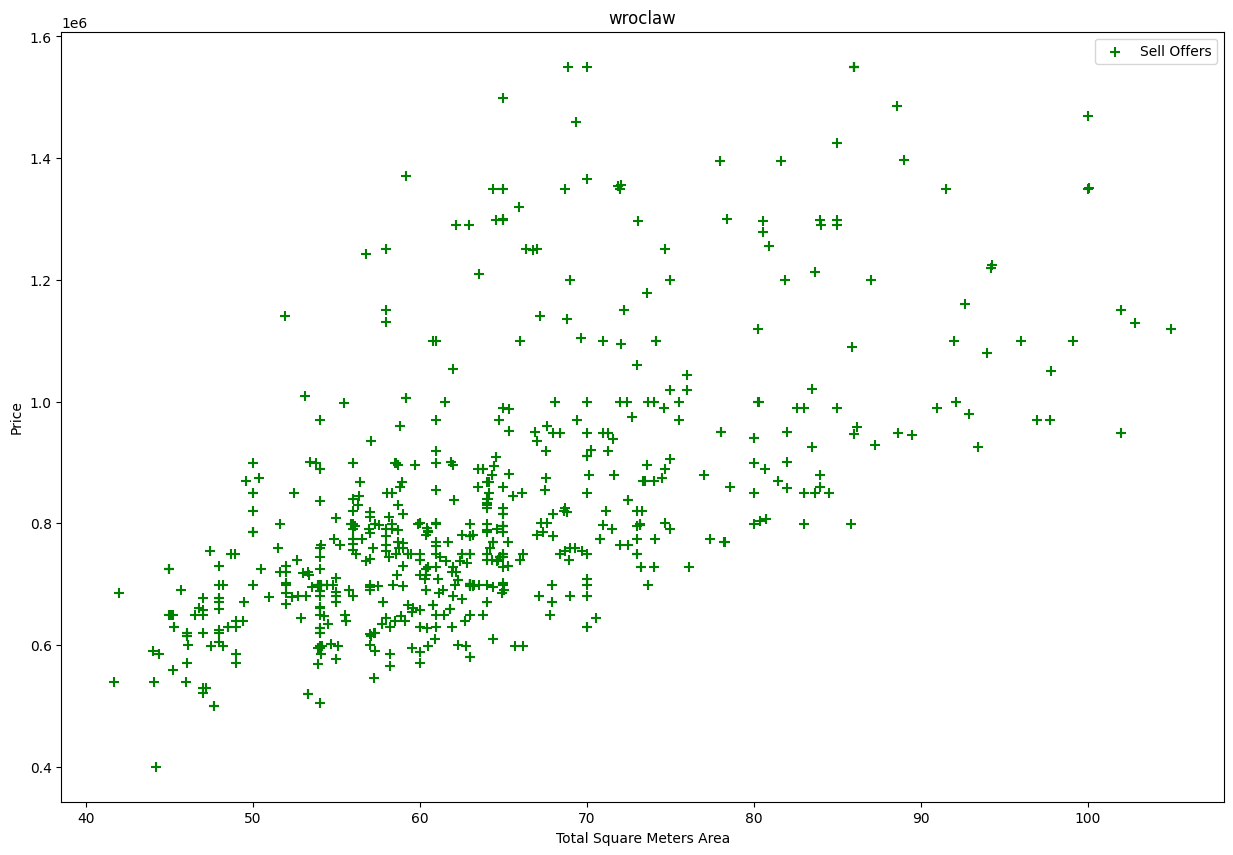

In [20]:
def make_plot(df, location):
    sell = df[(df.city==location)&(df.rooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(sell.squareMeters,sell.price,marker='+',color='green',label='Sell Offers',s=50)
    plt.xlabel('Total Square Meters Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

make_plot(data, 'wroclaw')

In [21]:
data[(data.price > 900000) & (data.rooms ==1) & (data.squareMeters > 34)]

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
1952,krakow,3,35.0,1.0,2.0,10.0,2022.0,50.057155,19.959584,1.52,...,0.126,0.423,0.286,0,0,1,1,0,0,950000
1960,krakow,3,34.5,1.0,1.0,10.0,2022.0,50.056010,19.959362,1.50,...,0.132,0.355,0.360,0,0,1,1,1,0,960000
15043,warszawa,0,35.0,1.0,10.0,12.0,2008.0,52.183376,21.023505,5.54,...,0.218,1.690,0.182,0,1,1,1,0,0,950000
20196,warszawa,0,35.0,1.0,8.0,11.0,1962.0,52.229676,21.012229,0.63,...,0.059,0.229,0.142,1,0,0,1,0,0,940000


In [22]:
df_dummies = pd.get_dummies(data.city, dtype=int)
data = pd.concat([data,df_dummies], axis=1)
data.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,katowice,krakow,lodz,lublin,poznan,radom,rzeszow,szczecin,warszawa,wroclaw
0,szczecin,0,47.00,2.0,6.0,12.0,1981.0,53.428544,14.552812,0.79,...,0,0,0,0,0,0,0,1,0,0
1,szczecin,1,88.22,3.0,1.0,2.0,2000.0,53.449093,14.516844,4.09,...,0,0,0,0,0,0,0,1,0,0
3,szczecin,0,33.31,1.0,1.0,4.0,1963.0,53.436100,14.541200,1.93,...,0,0,0,0,0,0,0,1,0,0
4,szczecin,0,56.00,3.0,7.0,7.0,2018.0,53.447465,14.557811,2.68,...,0,0,0,0,0,0,0,1,0,0
5,szczecin,0,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,3.94,...,0,0,0,0,0,0,0,1,0,0


In [23]:
X = data.drop(['price', 'city'], axis=1)
y = data['price']

In [24]:
X.shape

(14321, 38)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((11456, 38), (2865, 38))

In [27]:
algos = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {'fit_intercept' : [True, False]}
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'params' : {'n_estimators' : [1, 5, 10, 50, 100],
                    'criterion' : ['squared_error', 'friedman_mse'],
                    'max_features' : ['sqrt', 'log2', None]}
    },
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'criterion' : ['squared_error', 'friedman_mse'],
            'splitter' : ['best', 'random']
        }
    }
}

scores = []
best_estimator = {}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, params in algos.items():
    gs = GridSearchCV(params['model'], params['params'], cv=cv, return_train_score=False, error_score=0)
    gs.fit(X_train,y_train)
    scores.append({
        'model' : algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })
    best_estimator[algo_name] = gs.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,linear_regression,0.774729,{'fit_intercept': False}
1,RandomForestRegressor,0.896070,"{'criterion': 'friedman_mse', 'max_features': ..."
2,DecisionTreeRegressor,0.800632,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [28]:
forest = best_estimator['RandomForestRegressor']
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9011443052407162

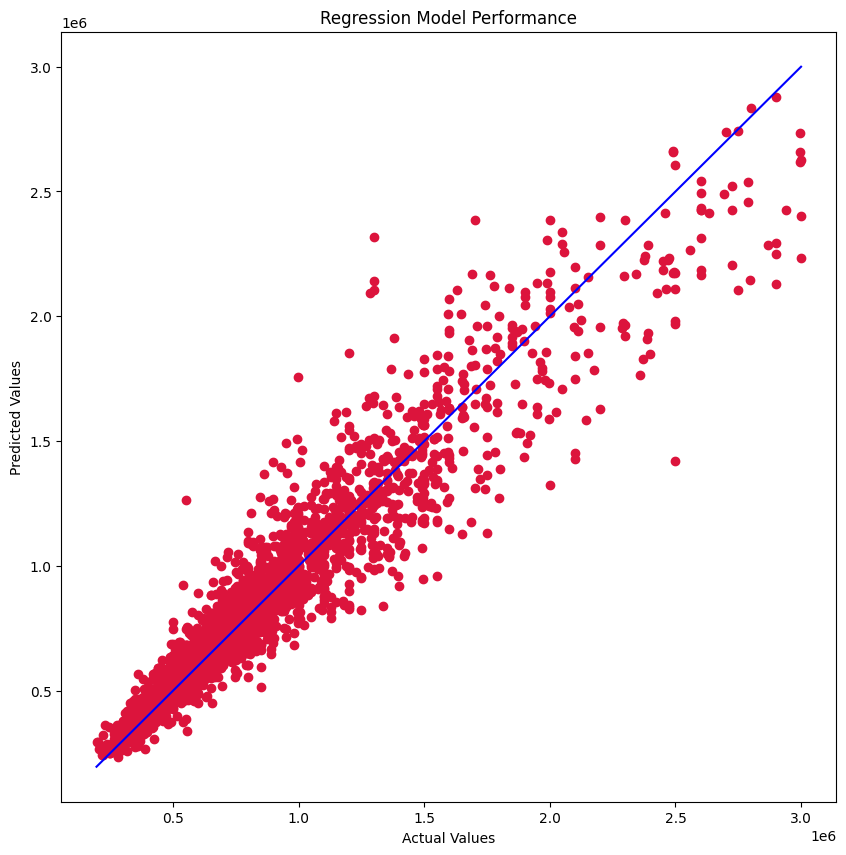

In [29]:
pred = forest.predict(X_test)
p1 = min(y_test)
p2 = max(y_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Performance')
plt.plot([p1, p2], [p1, p2], 'b-')